# Lesson: Anomaly Detection - DENSITY-BASED CLUSTERING

<a href = "https://www.canva.com/design/DAFlotxVbWc/Ok6O4AHmRQ0sd31DKXUaug/view?utm_content=DAFlotxVbWc&utm_campaign=designshare&utm_medium=link&utm_source=publishsharelink">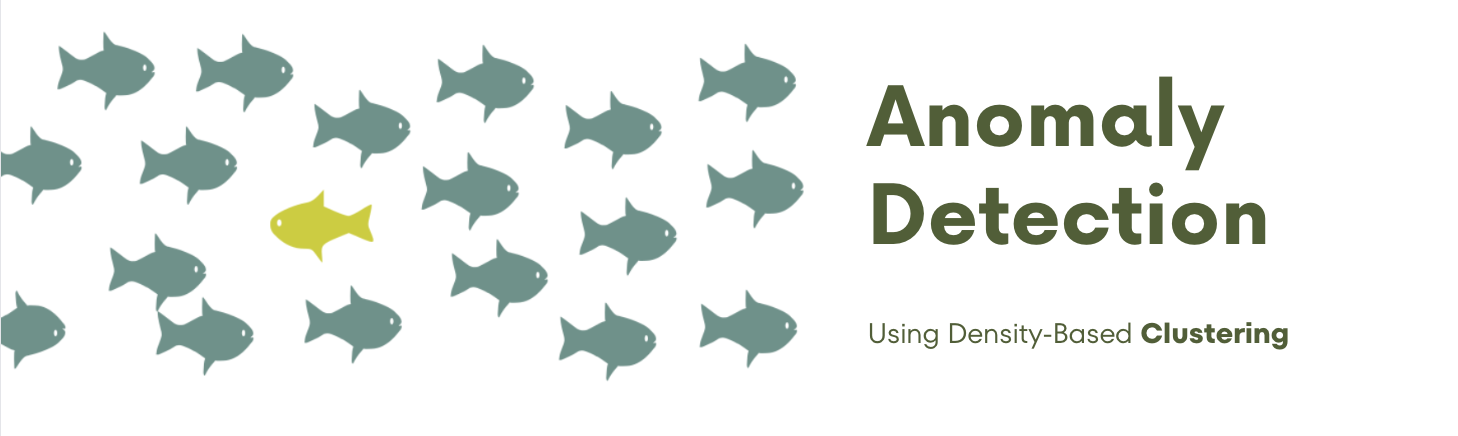</a>

<hr style="border:2px solid gray">

- Assumption: Data points that are similar tend to belong to similar groups or clusters, as determined by their distance from local centroids. Normal data points occur around a dense neighborhood and abnormalities are far away.

- Using density based clustering, like DBSCAN, we can design the model such that the data points that do not fall into a cluster are the anomalies.

# Steps
1. Select variables you want to cluster: 
> `df = df[["col1", "col2"]]`

2. Convert to array & dtype float: 
> `np_array = df.values.astype("float32", copy = False)`

3. Scale to standard normal:
> `scaler = StandardScaler().fit(np_array) np_array = scaler.transform(np_array)`

4. Create DBSCAN object and fit: 
> `dbsc = DBSCAN(eps = .75, min_samples = 15).fit(np_array)`

5. Extract labels: 
> `labels = dbsc.labels_`

6. Add labels back to original dataframe:
> `df['labels'] = labels`

7. Explore:
> `df.labels.value_counts() sns.scatterplot(df.col1, df.col2, hue=df.labels)`

In [5]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import itertools


# DBSCAN import
from sklearn.cluster import DBSCAN

# Scaler import
from sklearn.preprocessing import MinMaxScaler



# Acquire

In [13]:
def get_connection_url(db, username=os.getenv('sqlUSER'), host=os.getenv('sqlHOST'), password=os.getenv('sqlPSWD')):
    """
    This function will:
    - take username, pswd, host credentials from imported env module
    - output a formatted connection_url
    """
    return f'mysql+pymysql://{username}:{password}@{host}/{db}'


In [14]:
from env import host, username, password

def get_connection_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'

In [63]:
url = get_connection_url("grocery_db")

sql = """
select *
from grocery_customers
"""

df = pd.read_sql(sql, url, index_col="customer_id")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


___

# Follow the Steps

# Step 1: Select variables you want to cluster

In [18]:
# Cluster on all or a selected subset of features
grocery_milk_fresh = df[["Grocery", "Milk", "Fresh"]]
grocery_milk_fresh.head()

,Grocery,Milk,Fresh
customer_id,,,
0,7561,9656,12669
1,9568,9810,7057
2,7684,8808,6353
3,4221,1196,13265
4,7198,5410,22615


# Step 2: Convert to array & dtype float

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [20]:
grocery_milk_fresh.iloc[0]

Grocery     7561
Milk        9656
Fresh      12669
Name: 0, dtype: int64

In [30]:
grocery_milk_fresh.values.astype("float32", copy=False)[0]

array([ 7561.,  9656., 12669.], dtype=float32)

In [35]:
#convert to an array and turn into float
np_array = grocery_milk_fresh.values.astype("float32", copy=False)

# Step 3: Scale to standard normal

In [64]:
# MAKE the scaler
mms = MinMaxScaler()

# FIT/transform the scaler
gmf_scaled = mms.fit_transform(np_array)

gmf_scaled

array([[0.08146416, 0.13072723, 0.11294005],
       [0.10309667, 0.13282411, 0.06289903],
       [0.08278991, 0.11918086, 0.05662161],
       ...,
       [0.32594284, 0.21013576, 0.12954311],
       [0.02402535, 0.02622442, 0.09172701],
       [0.02702178, 0.02237109, 0.02482434]], dtype=float32)

In [37]:
grocery_milk_fresh.columns

Index(['Grocery', 'Milk', 'Fresh'], dtype='object')

In [38]:
["Scaled_" + column for column in grocery_milk_fresh.columns]

['Scaled_Grocery', 'Scaled_Milk', 'Scaled_Fresh']

In [40]:
# Now, let's add the scaled value columns back onto the dataframe
scaled_columns = ["Scaled_" + column for column in grocery_milk_fresh.columns]

In [41]:
# Save a copy of the original dataframe
original_df = df.copy()

In [42]:
# Create a dataframe containing the scaled array of values
scaled_df = pd.DataFrame(gmf_scaled, columns=scaled_columns)

In [43]:
scaled_df

,Scaled_Grocery,Scaled_Milk,Scaled_Fresh
0,0.081464,0.130727,0.112940
1,0.103097,0.132824,0.062899
2,0.082790,0.119181,0.056622
3,0.045464,0.015536,0.118254
4,0.077552,0.072914,0.201626
...,...,...,...
435,0.172715,0.163338,0.264829
436,0.008202,0.018736,0.349761
437,0.325943,0.210136,0.129543
438,0.024025,0.026224,0.091727


In [45]:
df.merge(scaled_df, on=df.index)

,key_0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Grocery,Scaled_Milk,Scaled_Fresh
0,0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940
1,1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899
2,2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622
3,3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254
4,4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626
...,...,...,...,...,...,...,...,...,...,...,...,...
435,435,1,3,29703,12051,16027,13135,182,2204,0.172715,0.163338,0.264829
436,436,1,3,39228,1431,764,4510,93,2346,0.008202,0.018736,0.349761
437,437,2,3,14531,15488,30243,437,14841,1867,0.325943,0.210136,0.129543
438,438,1,3,10290,1981,2232,1038,168,2125,0.024025,0.026224,0.091727


In [46]:
# Merge the scaled and non-scaled values into one dataframe
df = df.merge(scaled_df, on=df.index)
df = df.drop(columns=["key_0"])

In [47]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Grocery,Scaled_Milk,Scaled_Fresh
0,2,3,12669,9656,7561,214,2674,1338,0.081464,0.130727,0.112940
1,2,3,7057,9810,9568,1762,3293,1776,0.103097,0.132824,0.062899
2,2,3,6353,8808,7684,2405,3516,7844,0.082790,0.119181,0.056622
3,1,3,13265,1196,4221,6404,507,1788,0.045464,0.015536,0.118254
4,2,3,22615,5410,7198,3915,1777,5185,0.077552,0.072914,0.201626


# Step 4: Create <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN</a> object and fit

#### Construct a DBSCAN object that requires a **minimum of 20 data points** in a neighborhood of **radius 0.1** to be considered a core point.

In [49]:
# Make the object
dbsc = DBSCAN(eps = .1, min_samples=20)

# Fit the object
dbsc.fit(gmf_scaled)

DBSCAN(eps=0.1, min_samples=20)

# Step 5: Extract labels


**NOTE:**
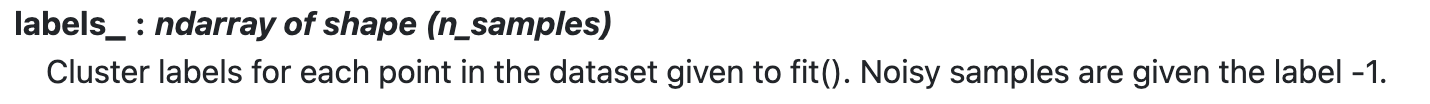

In [50]:
dbsc.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0

# Step 6: Add labels back to original dataframe

In [51]:
# Assign the cluster labels
df['gmf_labels'] = dbsc.labels_

In [52]:
#see what this dataframe looks like
df.sample(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Scaled_Grocery,Scaled_Milk,Scaled_Fresh,gmf_labels
321,1,2,9155,1897,5167,2714,228,1113,0.055660,0.025081,0.081606,0
66,1,3,9,1534,7417,175,3468,27,0.079912,0.020138,0.000054,0
146,1,3,7769,1936,2177,926,73,520,0.023433,0.025612,0.069248,0
132,1,3,14903,2032,2479,576,955,328,0.026688,0.026919,0.132860,0
420,1,3,4456,5266,13227,25,6818,1393,0.142535,0.070953,0.039706,0


# Step 7: Explore

<div class="alert alert-block alert-info">
<b>Remember:</b> 
<br>
    
- <b>-1</b>: refers to data that does <u>not</u> fall into a cluster
- <b>0</b>: refers to data that does fall into a cluster
</div>

In [66]:
#let's see what labels holds
df.gmf_labels.value_counts()

AttributeError: 'DataFrame' object has no attribute 'gmf_labels'

In [67]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
customer_id,,,,,,,,
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [56]:
for combination in itertools.combinations(grocery_milk_fresh.columns, 2):
    print(combination)


('Grocery', 'Milk')
('Grocery', 'Fresh')
('Milk', 'Fresh')


In [57]:
combination[0]

'Milk'

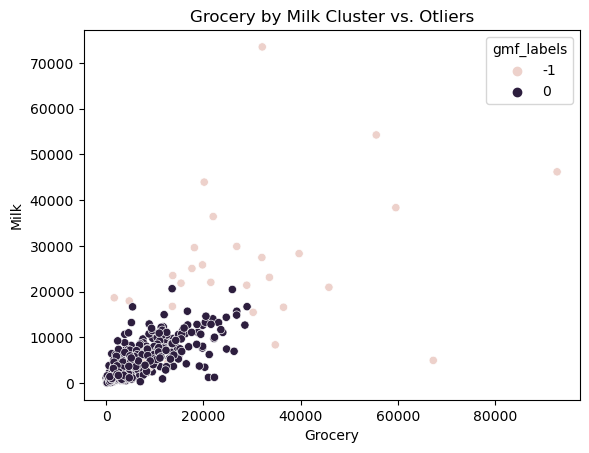

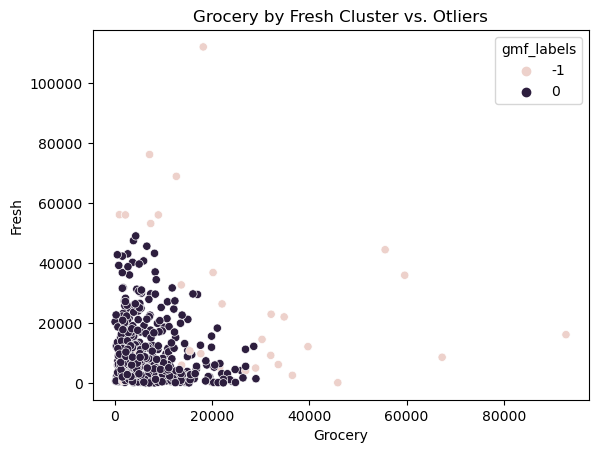

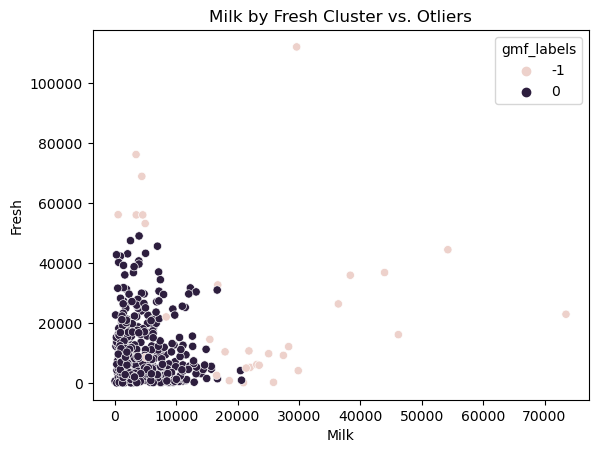

In [61]:
for combination in itertools.combinations(grocery_milk_fresh.columns, 2):
    sns.scatterplot(df[combination[0]], df[combination[1]], hue= df.gmf_labels)
    plt.title(f"{combination[0]} by {combination[1]} Cluster vs. Otliers")
    plt.show()

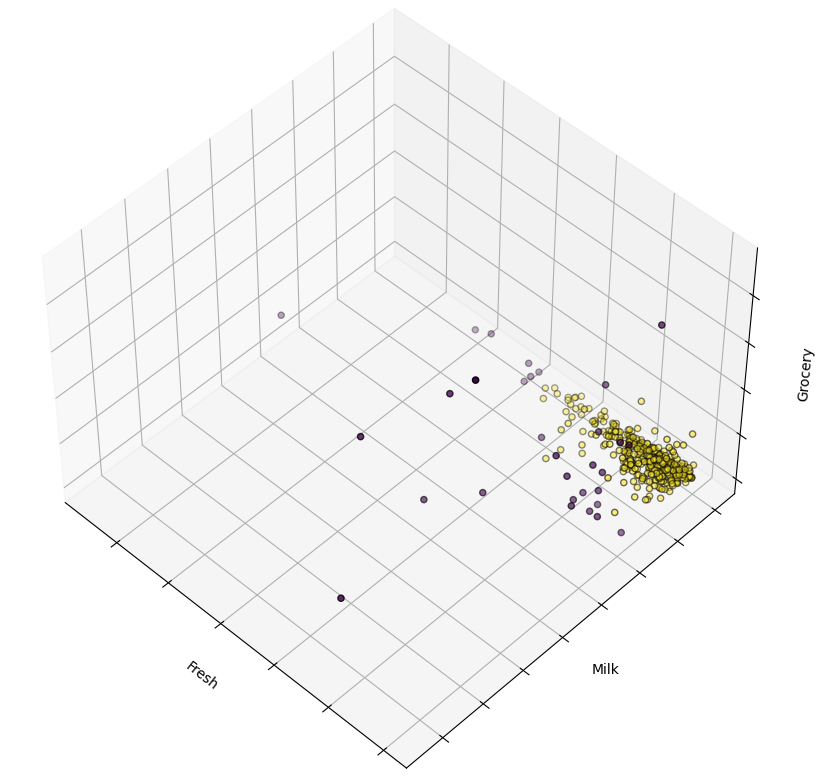

In [62]:
from mpl_toolkits.mplot3d import Axes3D

    
# Create a figure with a size of 8x8
fig = plt.figure(1, figsize=(8, 8))

# Create a 3D axes object with specified rect, elevation, and azimuth
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

# Plot the points using the Fresh, Milk, and Grocery columns from the DataFrame
# Color the points based on the gmf_labels column and add black edges
ax.scatter(df.Fresh, df.Milk, df.Grocery, c=df.gmf_labels, edgecolor='k')

# Remove tick labels for the x-axis, y-axis, and z-axis
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

# Set labels for the x-axis, y-axis, and z-axis
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Grocery')

# Display the plot
plt.show()


# Exercises:

file name: `clustering_anomaly_detection.py` or `clustering_anomaly_detection.ipynb`

### Clustering - DBSCAN

### 1. Use DBSCAN to detect anomalies in other products from the `customers` dataset. The database name is `grocery_db`.



### 2. Use DBSCAN to detect anomalies in requests from the curriculum access logs in the `curriculum_logs` database.



### 3. Use DBSCAN to detect anomalies in number of bedrooms and finished square feet of property for the filtered dataset you used in the <a href="https://ds.codeup.com/clustering/explore/#exercises">clustering evaluation exercises</a> (single unit properties with a logerror).